In this dataset we are going to work on customer details, and will try to predict weather the customer has left the company or not.

In [1]:
#import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Read & Observe Data

/Users/dhanrajtentu/ds-projects/projects/01-customer-churn/code.ipynb

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
# remove some non necessary columns
#df.drop(columns=['customerID','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies','PaymentMethod'],inplace=True)

In [8]:
df.drop(columns=["customerID"],inplace=True)

In [9]:
for column in df.columns:
    print(f"{column}: {df[column].unique()}")
    print('-'*50)

gender: ['Female' 'Male']
--------------------------------------------------
SeniorCitizen: [0 1]
--------------------------------------------------
Partner: ['Yes' 'No']
--------------------------------------------------
Dependents: ['No' 'Yes']
--------------------------------------------------
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
--------------------------------------------------
PhoneService: ['No' 'Yes']
--------------------------------------------------
MultipleLines: ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService: ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity: ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup: ['Yes' 'No' 'No internet service

## Data Cleaning

In [10]:
#remove the columns where the data is imbalance
df.drop(columns=['gender','PhoneService','MultipleLines'],inplace=True)

In [11]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,No,No,34,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,0,No,No,2,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,No,No,45,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,No,No,2,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
df.shape

(7043, 17)

In [13]:
df.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

First we need to convert Yes No to int 0 or 1 type

In [14]:
for col in df.columns:
    print(f"{col} : {df[col].dtype}")

SeniorCitizen : int64
Partner : object
Dependents : object
tenure : int64
InternetService : object
OnlineSecurity : object
OnlineBackup : object
DeviceProtection : object
TechSupport : object
StreamingTV : object
StreamingMovies : object
Contract : object
PaperlessBilling : object
PaymentMethod : object
MonthlyCharges : float64
TotalCharges : object
Churn : object


In [15]:
# create a function to change the yes no to 1 or 0
def convert_string_int(df):
    accecpt = {'Yes', "No"}
    #get the column names with only yes or no
    yes_no_column = [col for col in df.columns
                    if all(
                        str(val).strip() in accecpt
                        for val in df[col].unique()
                    )]
    to_int_dict = {'yes':1,'no' :0}
    # change yes or no columns to 1 or 0
    for col in yes_no_column:
        df[col] = df[col].str.strip().str.lower().map(to_int_dict)
        df[col] = df[col].astype(int)
    accecpt_two = {'yes','no','no internet service'}
    column_name_two = [col for col in df.columns
                   if all(
                       str(val).strip().lower() in accecpt_two
                       for val in df[col].unique() 
                   )]
    to_int_dict_two =  {'yes':1,'no' :0, 'no internet service':0}
    for col in column_name_two:
        df[col] = df[col].str.strip().str.lower().map(to_int_dict_two)
        df[col] = df[col].astype(int)
    return df    
    

In [16]:
df = convert_string_int(df)

In [17]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,34,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,0,0,0,2,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,45,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,2,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [18]:
#save cleaned dataset
df.to_csv("Churn_Cleaned_dataset.csv")

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   Partner           7043 non-null   int64  
 2   Dependents        7043 non-null   int64  
 3   tenure            7043 non-null   int64  
 4   InternetService   7043 non-null   object 
 5   OnlineSecurity    7043 non-null   int64  
 6   OnlineBackup      7043 non-null   int64  
 7   DeviceProtection  7043 non-null   int64  
 8   TechSupport       7043 non-null   int64  
 9   StreamingTV       7043 non-null   int64  
 10  StreamingMovies   7043 non-null   int64  
 11  Contract          7043 non-null   object 
 12  PaperlessBilling  7043 non-null   int64  
 13  PaymentMethod     7043 non-null   object 
 14  MonthlyCharges    7043 non-null   float64
 15  TotalCharges      7043 non-null   object 
 16  Churn             7043 non-null   int64  


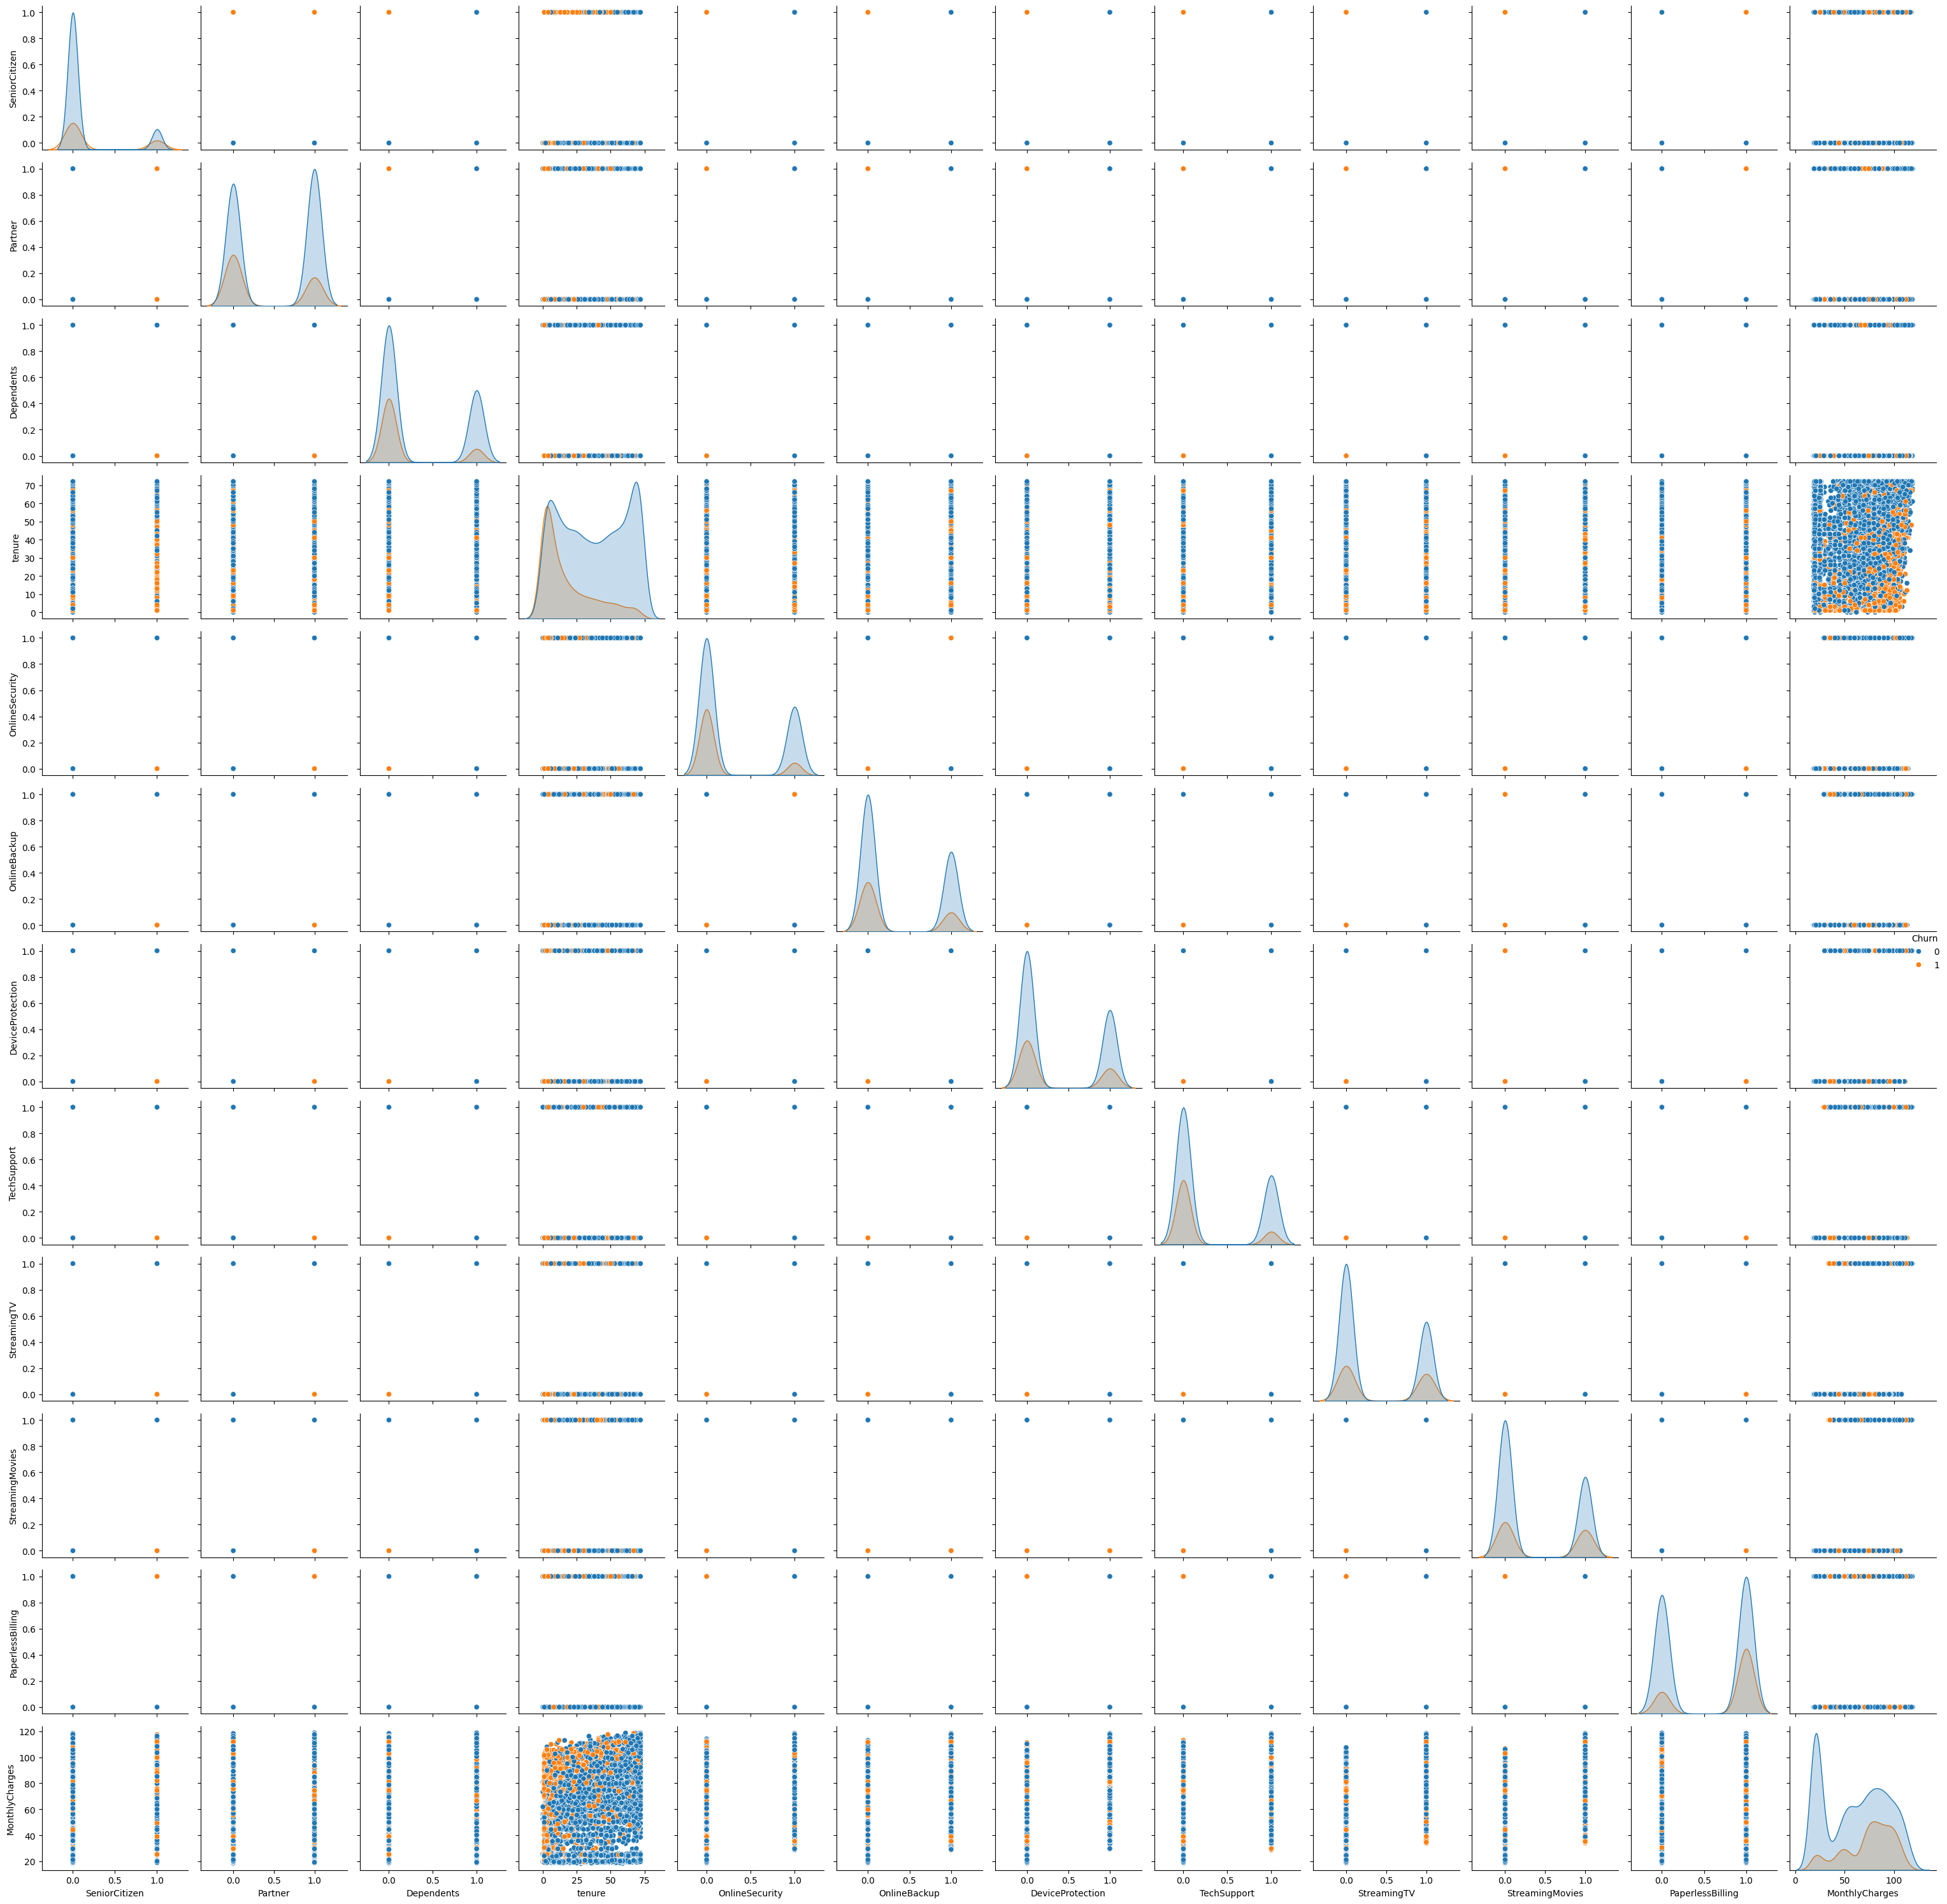

In [20]:
sns.pairplot(data=df, hue='Churn')
plt.tight_layout()
plt.show()

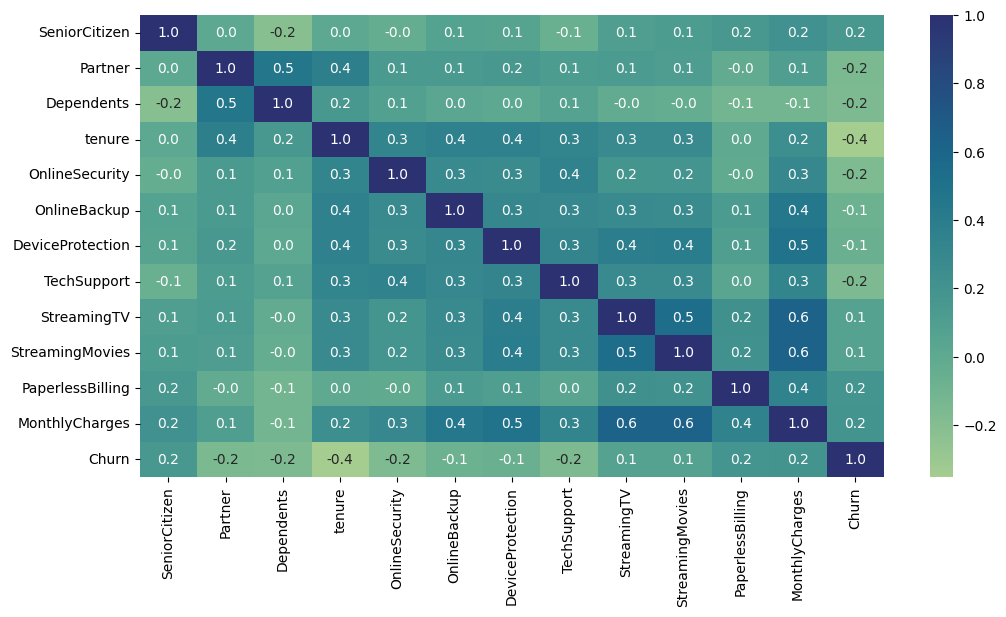

In [21]:
plt.figure(figsize=(12,6))
sns.heatmap(data=df.corr(numeric_only=True),annot=True, fmt= '.1f',cmap='crest')
plt.show()

## Feature Selection and Modelling

In [22]:
# import libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

In [23]:
X = df.drop(columns='Churn',axis=1)
y = df['Churn']

# train test spllit
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)

In [24]:
# get numeric features
numeric_features = X.select_dtypes(int).columns.to_list()
cat_features = X.select_dtypes(object).columns.to_list()
numeric_features.append('MonthlyCharges') # append the only float columns

In [25]:
# Scale and Encode the numeric and categorical columns respectively

# scale numeric
numeric_transformer = Pipeline([
    ('scaler', StandardScaler())
])
# onehot the categorical
cat_transformer = Pipeline([
    ('ohe', OneHotEncoder(handle_unknown='ignore',sparse_output=False,drop='first'))
])

# transform
preprocessor = ColumnTransformer([
    ('num',numeric_transformer,numeric_features),
    ('cat',cat_transformer,cat_features)
],remainder='drop')

In [26]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['SeniorCitizen', 'Partner', 'Dependents',
                                  'tenure', 'OnlineSecurity', 'OnlineBackup',
                                  'DeviceProtection', 'TechSupport',
                                  'StreamingTV', 'StreamingMovies',
                                  'PaperlessBilling', 'MonthlyCharges']),
                                ('cat',
                                 Pipeline(steps=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['InternetService', 'Contract',
                                  'PaymentMethod', 'TotalCharges'])])

In [27]:
# from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")
warnings.filterwarnings("ignore", category=RuntimeWarning)


Logistic Regression
F1 Score         : 0.6135084427767354
Precision Score  : 0.47186147186147187
Recall Score: 0.8766756032171582
Confustion Matrix : 
[[670 366]
 [ 46 327]]


<Figure size 400x200 with 0 Axes>

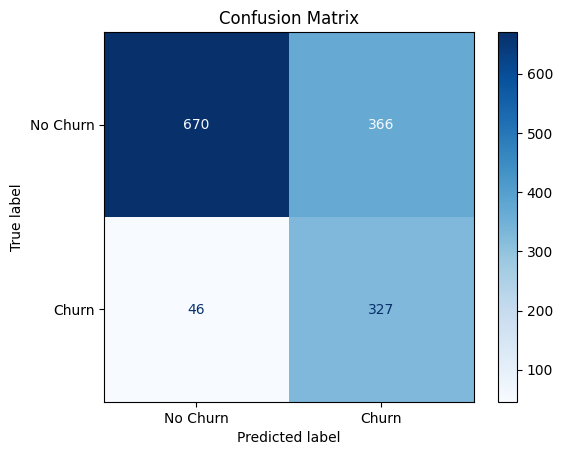

--------------------------------------------------
Random Forest
F1 Score         : 0.6104972375690608
Precision Score  : 0.6296296296296297
Recall Score: 0.5924932975871313
Confustion Matrix : 
[[906 130]
 [152 221]]


<Figure size 400x200 with 0 Axes>

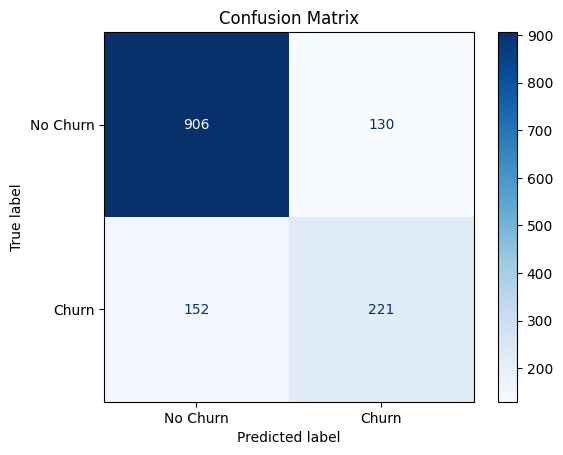

--------------------------------------------------


In [28]:

models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced',
    max_iter=500,
    C=0.1,solver='lbfgs'),
    'Random Forest': RandomForestClassifier(),
    #"GBosst" : GradientBoostingClassifier()
}

for name, clf in models.items():
    print(name)

    pipe = Pipeline(steps=[
        ('preprocess', preprocessor),
        ('classifier', clf)
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)  
    y_proba = pipe.predict_proba(X_test)[:, 1] # get the probability
    y_pred = (y_proba >= 0.40).astype(int) # reduce the probability to get more accurates churns

   # print(f"Accuracy Score   : {accuracy_score(y_test, y_pred)}")
    print(f"F1 Score         : {f1_score(y_test, y_pred)}")
    print(f"Precision Score  : {precision_score(y_test, y_pred)}")
    print(f"Recall Score: {recall_score(y_test,y_pred)}")
    print(f"Confustion Matrix : \n{confusion_matrix(y_test,y_pred)}")
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 2))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])
    disp.plot(cmap="Blues", values_format='d')
    plt.title("Confusion Matrix")
    plt.show()
    print("-" * 50)



After tuning the model and after changing the parameters of logistic regression we got the highest recall score that is 0.87. As our data is trying to predict a bussiness, the false positives and false negatives should be considered and must be more accurate.

In [29]:
import pickle 

In [30]:
pickle.dump(pipe,open("pipeline_churn.pkl",'wb'))